In [1]:
from ising_model_simulation import *
from time import time
import matplotlib.pyplot as plt

T=1.0


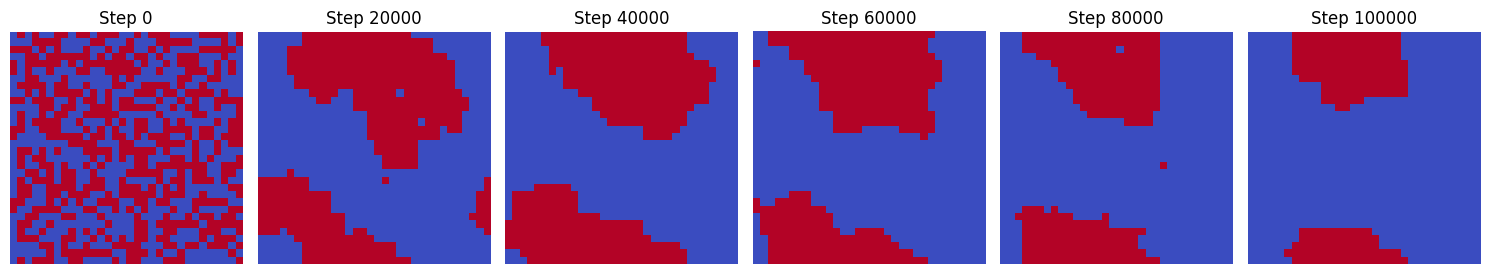

T=2.3


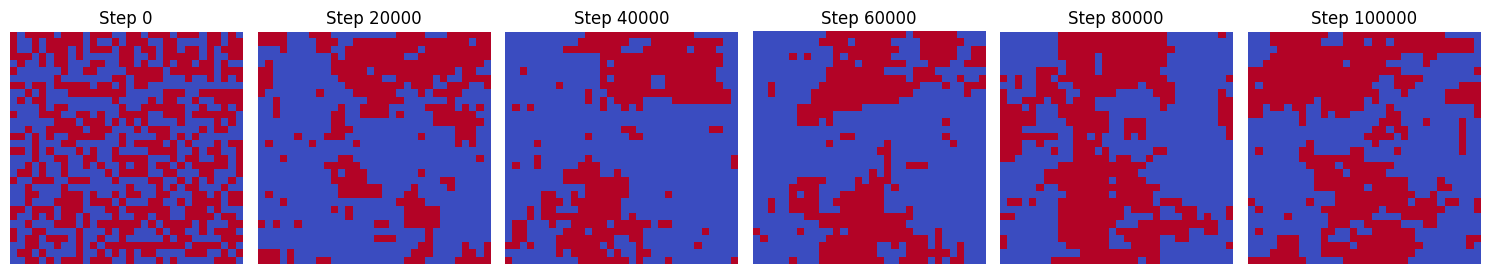

T=4


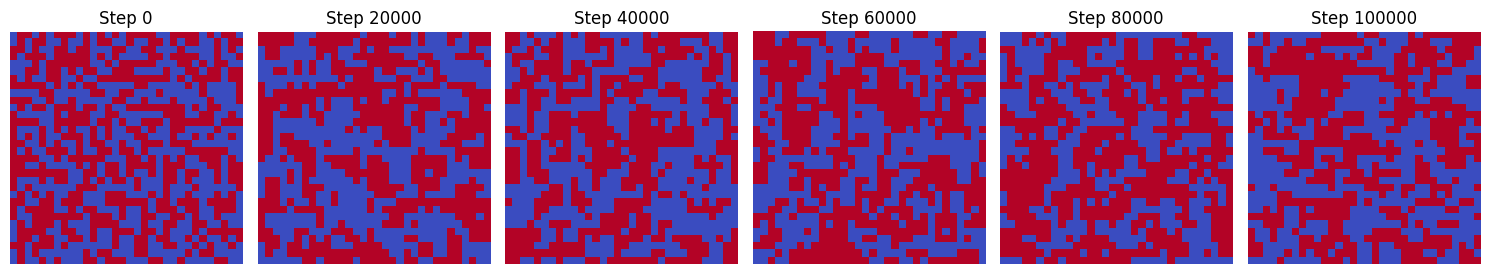

In [2]:
# Visualize the evolution of the lattice for different temperatures
steps = 100_000
interval = steps // 5 # show 5 frames

for T in [1.0, 2.3, 4]:
    print(f"T={T}")
    visualize_lattice_evolution(L=32, 
                                J=1, 
                                T=T, 
                                B=0, 
                                steps=steps, 
                                algo="metropolis", 
                                interval=interval, 
                                initial_state='random',
                                )

In [3]:
lattice_sizes = [8, 16, 32]
temps = np.linspace(0.5, 5, 30)

## Ferromagnetic interactions (J>0) and zero magnetic field

Running simulation for lattice size: 8x8


L=8: 100%|██████████| 30/30 [00:12<00:00,  2.48it/s]


Running simulation for lattice size: 16x16


L=16: 100%|██████████| 30/30 [00:13<00:00,  2.23it/s]


Running simulation for lattice size: 32x32


L=32: 100%|██████████| 30/30 [01:01<00:00,  2.04s/it]


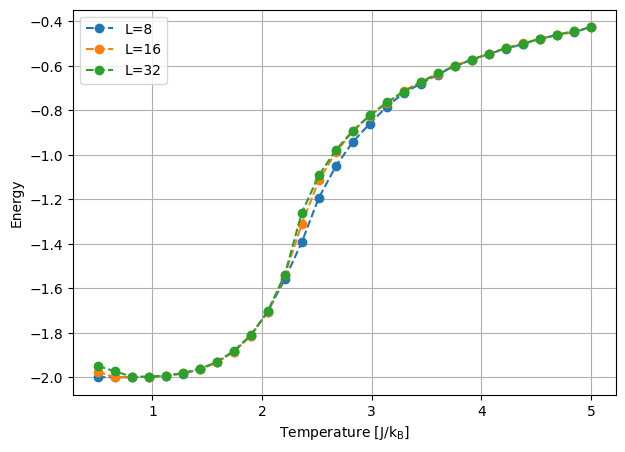

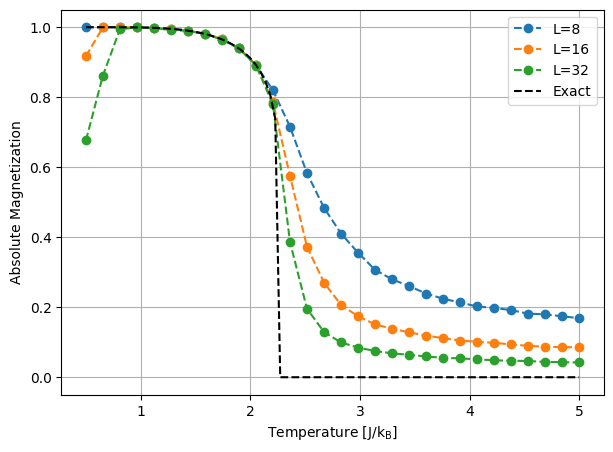

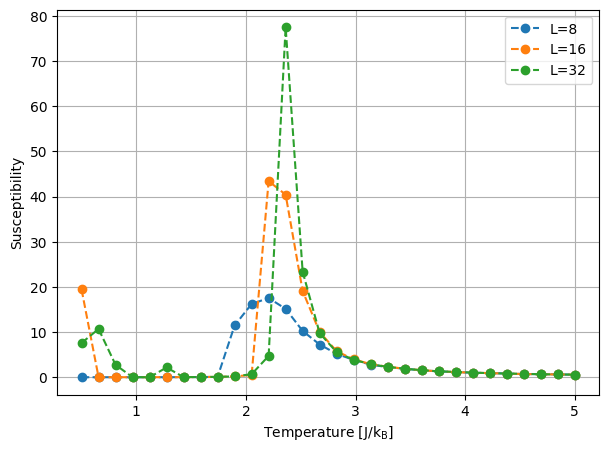

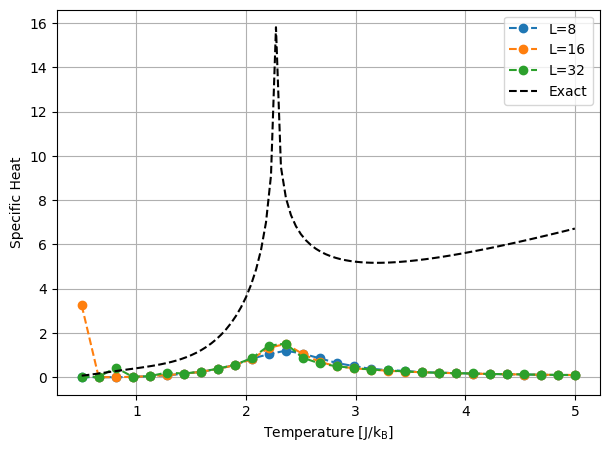

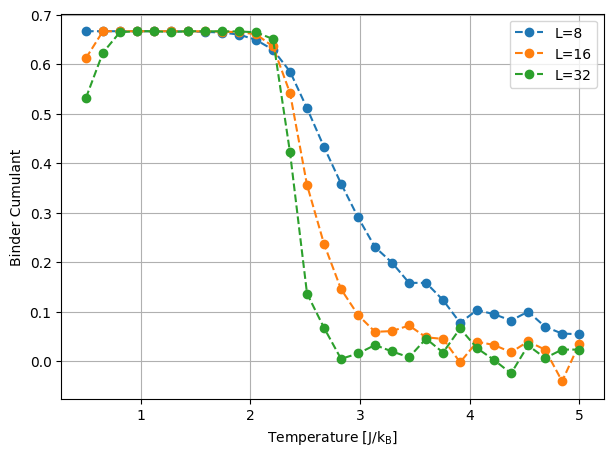

In [4]:
# take time measurements to compare with heatbath algorithm
m_start = time()

m_results = run_simulation(
    lattice_sizes, 
    temps,
    J=1, 
    B=0, 
    thermalization_steps=5_000, 
    measurement_steps=10_000, 
    measurement_interval=10, 
    algo="metropolis", 
    num_MCS=5)

m_end = time()
m_time = m_end - m_start

plot_results(m_results)

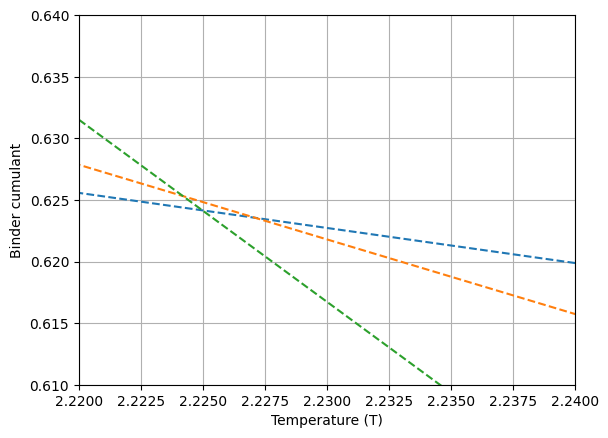

In [5]:
# find the crossing point of the cumulants for the various lattice sizes, which will give us an estimate of the critical temperature
a = 11
b = 13

plt.plot(m_results['T'][a:b], m_results[8]['U_L'][a:b], 'o--', label='L=8')
plt.plot(m_results['T'][a:b], m_results[16]['U_L'][a:b], 'o--', label='L=16')
plt.plot(m_results['T'][a:b], m_results[32]['U_L'][a:b], 'o--', label='L=32')
plt.xlabel('Temperature (T)')
plt.ylabel('Binder cumulant')
plt.xlim(2.22, 2.24)
plt.ylim(0.61, 0.64)
plt.grid()

## Antiferromagnetic coupling (J<0) and for non-zero values of the external field B

Running simulation for lattice size: 8x8


L=8: 100%|██████████| 30/30 [00:09<00:00,  3.21it/s]


Running simulation for lattice size: 16x16


L=16: 100%|██████████| 30/30 [00:16<00:00,  1.79it/s]


Running simulation for lattice size: 32x32


L=32: 100%|██████████| 30/30 [00:55<00:00,  1.85s/it]


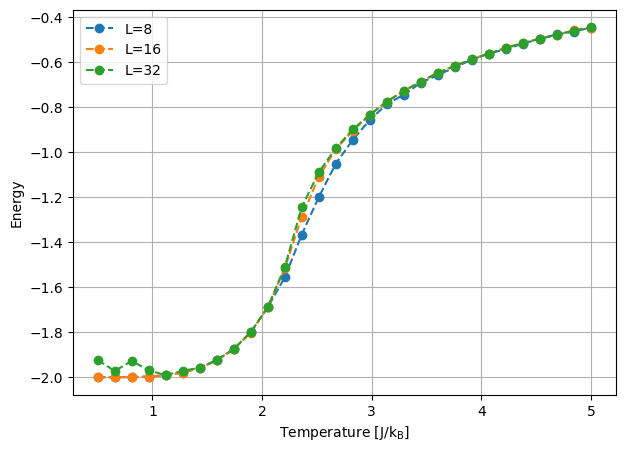

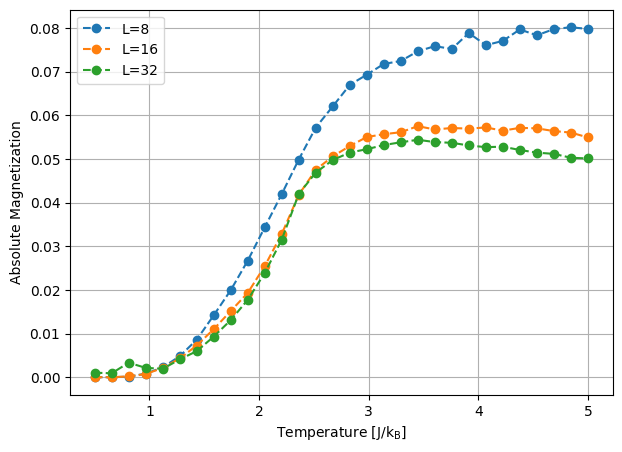

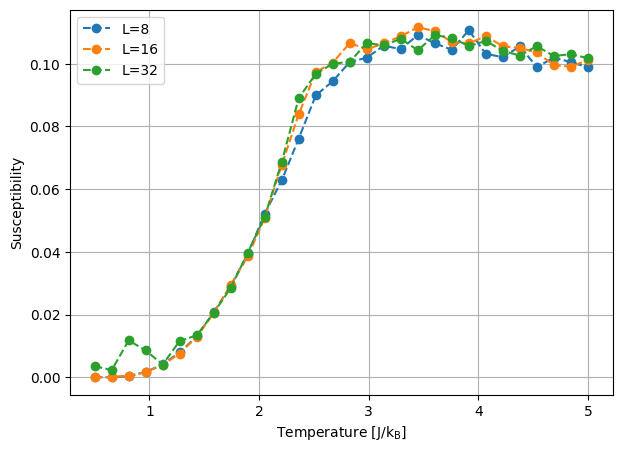

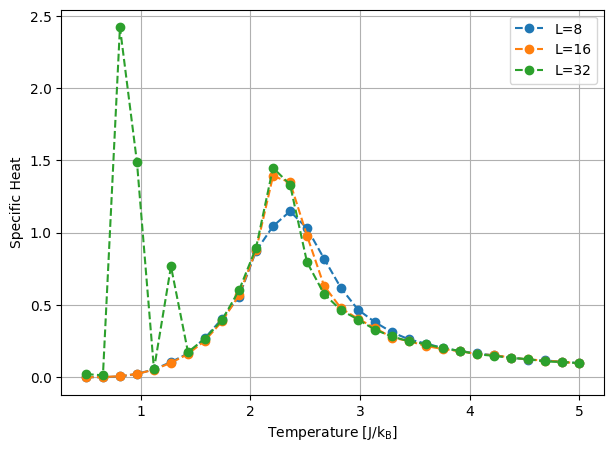

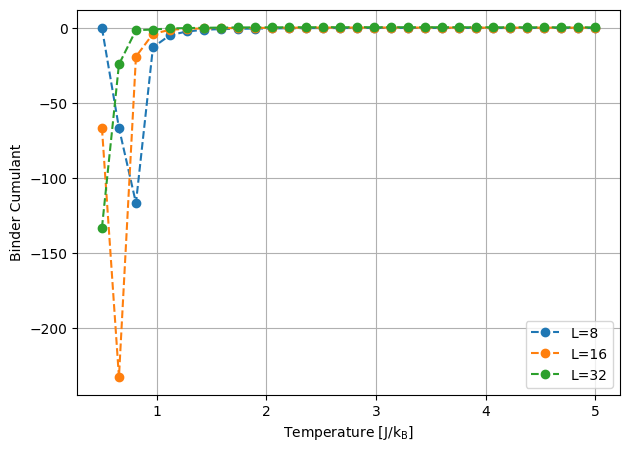

In [6]:
results = run_simulation(
    lattice_sizes, 
    temps,
    J=-1, 
    B=0.5, 
    thermalization_steps=5_000, 
    measurement_steps=10_000, 
    measurement_interval=10, 
    algo="metropolis", 
    num_MCS=5)

plot_results(results, include_exact=False)

## Comparison of results and efficiency for Metropolis and Heat bath algorithm

In [7]:
# run the same simulation (as the ferromagnetic one with metropolis algorithm) with the heat bath algorithm
hb_start = time()
hb_results = run_simulation(
    lattice_sizes, 
    temps,
    J=1, 
    B=0, 
    thermalization_steps=5_000, 
    measurement_steps=10_000, 
    measurement_interval=10, 
    algo="heat_bath", 
    num_MCS=5)
hb_end = time()
hb_time = hb_end - hb_start

Running simulation for lattice size: 8x8


L=8: 100%|██████████| 30/30 [00:03<00:00,  9.02it/s]


Running simulation for lattice size: 16x16


L=16: 100%|██████████| 30/30 [00:14<00:00,  2.12it/s]


Running simulation for lattice size: 32x32


L=32: 100%|██████████| 30/30 [00:53<00:00,  1.79s/it]


In [8]:
# Compare the time taken by both algorithms
print(f"Metropolis took {m_time:.2f} seconds")
print(f"Heat Bath took {hb_time:.2f} seconds")

Metropolis took 86.84 seconds
Heat Bath took 71.34 seconds


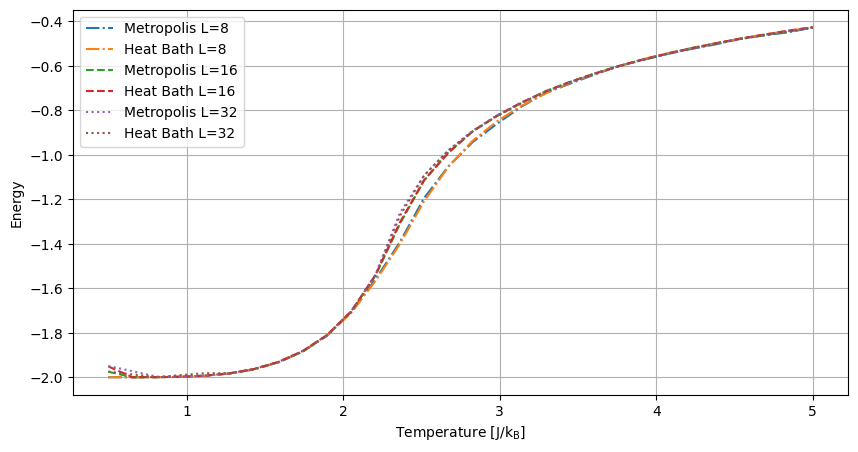

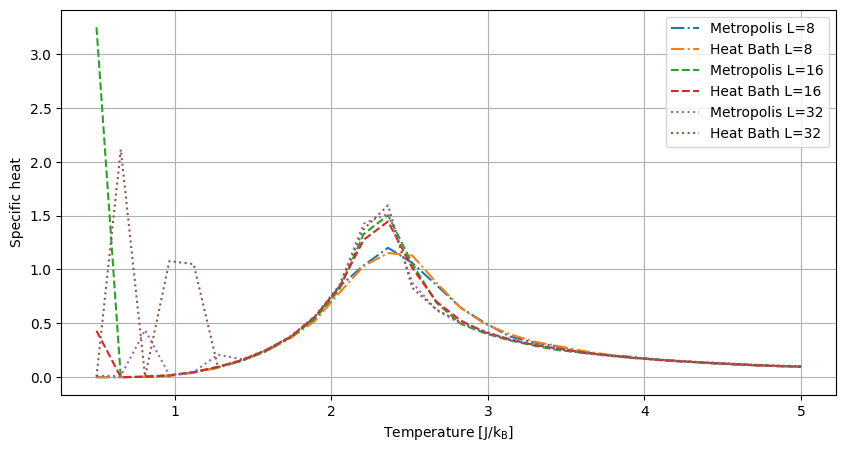

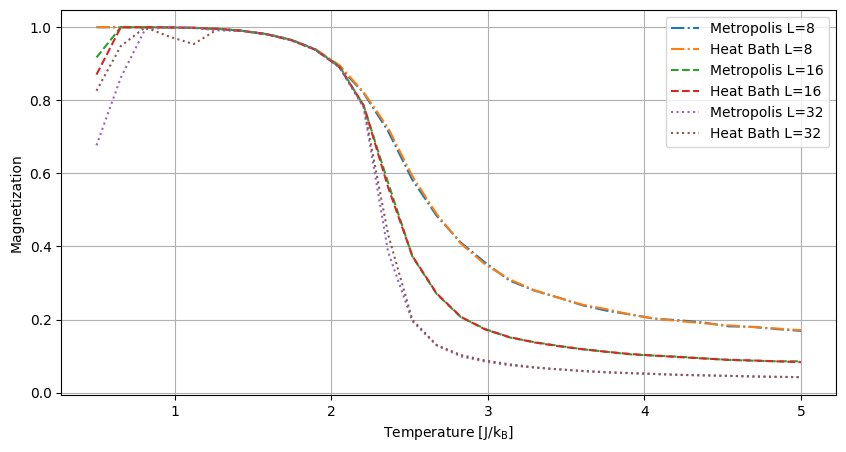

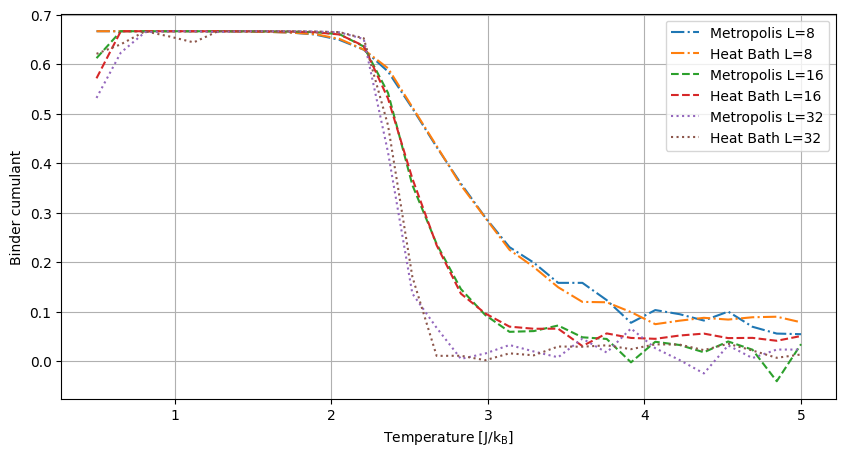

In [9]:
# Plot the results for both algorithms
observables = {
    "E": "Energy",
    "C_B": "Specific heat",
    "M_abs": "Magnetization",
    "U_L": "Binder cumulant"
}

linestyles = {
    8: "dashdot",
    16: "dashed",
    32: "dotted"
}

for obs, ylabel in observables.items():
    plt.figure(figsize=(10, 5))
    for L in [8, 16, 32]:
        plt.plot(temps, m_results[L][obs], label=f'Metropolis L={L}', linestyle=linestyles[L])
        plt.plot(temps, hb_results[L][obs], label=f'Heat Bath L={L}', linestyle=linestyles[L])
    
    plt.xlabel(r"Temperature [$\text{J/k}_{\text{B}}$]")
    plt.ylabel(ylabel)
    plt.legend()
    plt.grid()
    plt.show()